In [24]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Mall_Customers.csv")

In [6]:
df.head(10)


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [4]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [8]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [17]:
df= df.drop(['CustomerID', 'Gender'], axis = 1)

In [18]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)

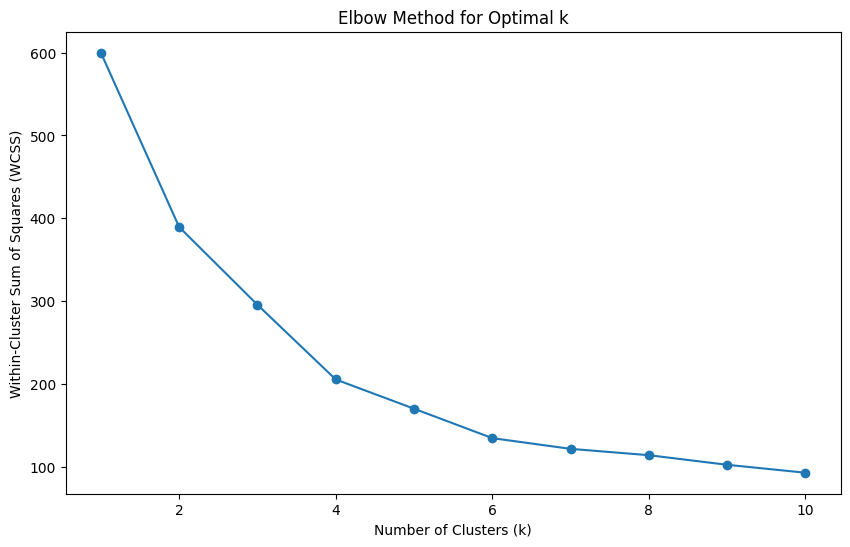

In [20]:
# Calculate WCSS for different values of k
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)  # Inertia represents WCSS for K-means

# Plot the WCSS values for each k
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.show()

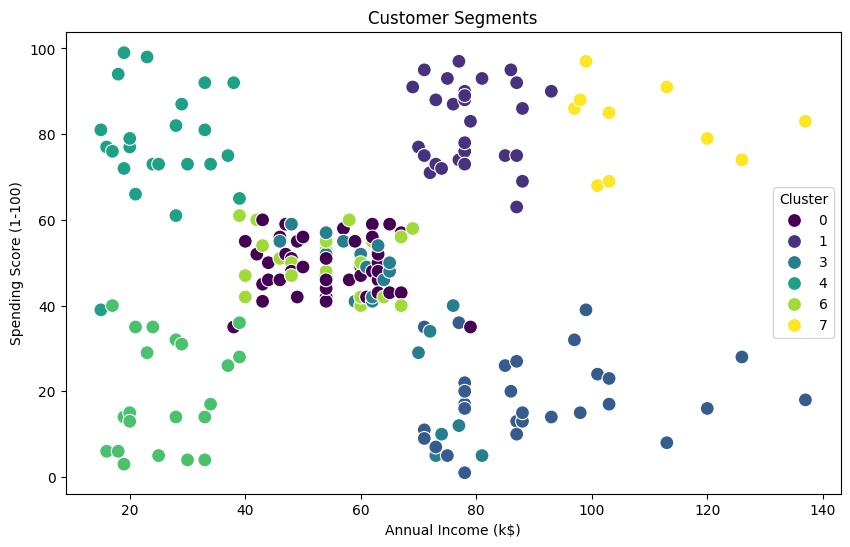

In [28]:
# Set the optimal number of clusters based on the elbow method
optimal_k = 8  # Replace this with the actual number from your elbow plot

# Initialize and fit the KMeans model
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(data_scaled)


# Create a scatter plot for clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'], hue=df['Cluster'], palette='viridis', s=100)
plt.title('Customer Segments')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.show()



               Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                       
0        56.906977           54.418605               48.953488
1        32.862069           78.551724               82.172414
2        44.000000           90.133333               17.933333
3        21.000000           63.227273               40.681818
4        25.000000           25.260870               77.608696
5        45.523810           26.285714               19.380952
6        33.409091           53.136364               50.318182
7        32.200000          109.700000               82.000000


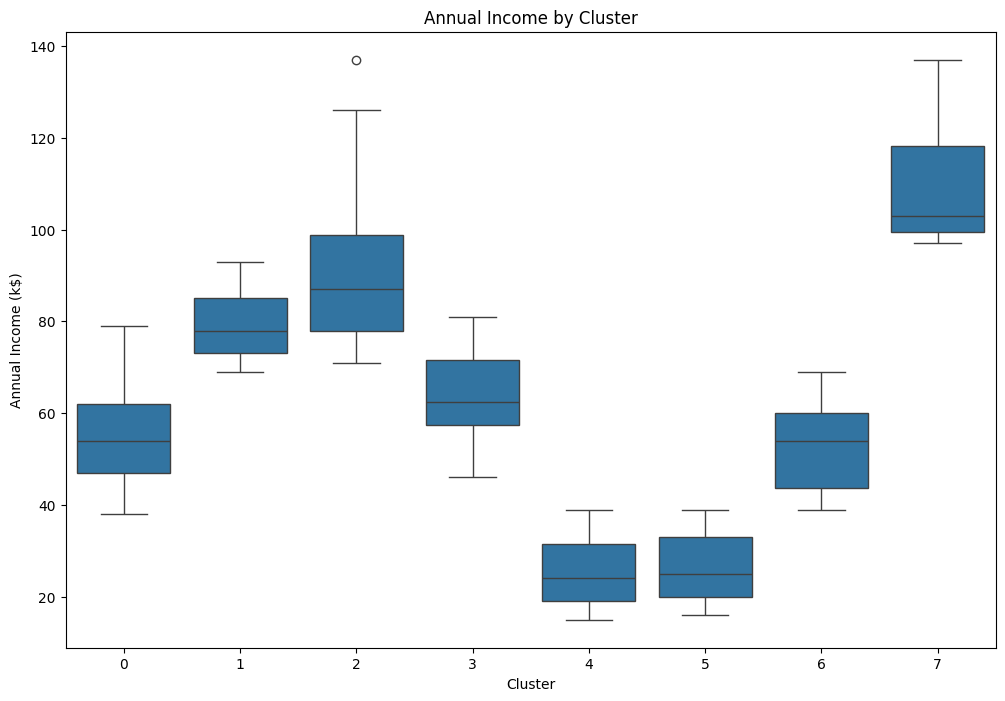

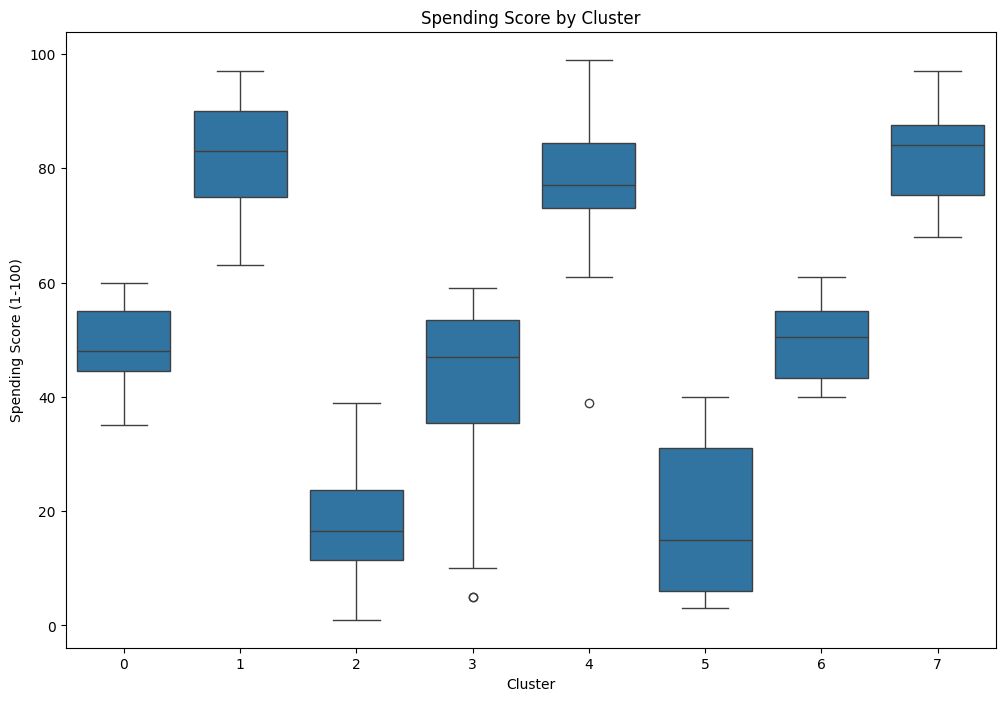

In [33]:
# Calculate the mean of each feature within each cluster
cluster_summary = df.groupby('Cluster').mean()
print(cluster_summary)


plt.figure(figsize=(12, 8))
sns.boxplot(x='Cluster', y='Annual Income (k$)', data=df)
plt.title('Annual Income by Cluster')
plt.show()

plt.figure(figsize=(12, 8))
sns.boxplot(x='Cluster', y='Spending Score (1-100)', data=df)
plt.title('Spending Score by Cluster')
plt.show()


Customer Segmentation Project: Findings and Recommendations
Objective:
The objective of this project was to segment mall customers based on their Annual Income and Spending Score to understand different customer groups. This analysis helps inform targeted marketing strategies to improve engagement and revenue.

Cluster Analysis and Insights
Cluster 0 - Budget-Conscious Customers:

Profile: Low-income customers who exhibit moderate spending. They are cost-conscious and responsive to value.
Strategy: Offer budget-friendly products, discounts, and promotions. Engage this segment with loyalty points and deals that provide value without requiring high spending.
Cluster 1 - Premium Customers:

Profile: High-income, high-spending customers who make up a valuable segment. They are likely interested in premium and exclusive products.
Strategy: Develop premium marketing strategies, such as exclusive memberships, early access to sales, and personalized recommendations. These efforts can help retain this valuable segment and build brand loyalty.
Cluster 2 - Discount-Driven Segment:

Profile: Moderate-income, low-spending customers who may need encouragement to spend more.
Strategy: Engage this group with seasonal sales, promotional campaigns, and discounts. Highlight affordability and value to encourage more frequent purchases.
Cluster 3 - Selective High-Income Segment:

Profile: Customers with high incomes but low spending, likely focused on quality or specific products.
Strategy: Emphasize quality over quantity in marketing campaigns. Highlight the premium aspects of products and services, offering them selective, high-quality options that align with their preferences.
Cluster 4 - Engaged Middle-Class Shoppers:

Profile: Moderate-income group with high spending, representing a middle-tier customer group who is highly engaged.
Strategy: Keep this group engaged with loyalty rewards, regular promotions, and consistent service. By maintaining their spending levels, the mall can maximize engagement from this profitable segment.



Recommendations
Tailored Marketing Campaigns:

Design specific marketing strategies for each segment. For example, focus on premium services for high-income, high-spending customers while providing value-based promotions for budget-conscious customers.
Customer Retention Initiatives:

Implement loyalty programs and exclusive offers, particularly for clusters that are high-spending or premium-focused. This will help increase customer retention and engagement over time.
Data-Driven Product Placement:

Use these insights for product placement in-store or online, catering to different clusters based on their spending behaviors and preferences.
Further Data Collection:

Consider collecting additional data points (e.g., frequency of visits, product preferences) to refine these segments further and create more personalized marketing strategies.